In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')
df=pd.read_csv('/Users/ranashakti7/Downloads/archive/fifa21_raw_data.csv')
df.head()

/var/folders/pz/g712dmd55hjfzl00wvnt5lw40000gn/T/ipykernel_11891/2354383790.py:7: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/ranashakti7/Downloads/archive/fifa21_raw_data.csv')


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


# check Columns

In [182]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

Remove unwanted columns ['photoUrl','LongName', 'playerUrl',]

In [183]:
df.drop(columns=['photoUrl', 'LongName', 'playerUrl'],inplace=True)


* spliit teams and contract in different columns

In [184]:
df['Team & Contract']=df['Team & Contract'].apply(lambda x: x.strip())
df['Teams']=df['Team & Contract'].apply(lambda x:x.split('\n')[0])
df['Contract']=df['Team & Contract'].apply(lambda x:x.split('\n')[-1])
df.drop(columns=['Team & Contract'],inplace=True)


* change joined data type from object to date

In [185]:
df['Joined']=pd.to_datetime(df['Joined'])

* change height to centimeters

In [186]:
def height_cm(height):
    height=height.replace('"','')
    feet,inches=height.split("'")
    return int(feet)*30+int(inches)*2.56
df['Height']=df['Height'].apply(lambda x: height_cm(x))
df.rename(columns={'Height':'Height(cms)'},inplace=True)


*  change Wieght to int and remoce LBS

In [187]:
df['Weight']=df['Weight'].apply(lambda x:int(x.replace('lbs','')))
df.rename(columns={'Weight':'Weight(lbs)'},inplace=True)

* Change Value to numeric

In [188]:
def convert_to_million(value):
    if ('M' in value):
        return float(value.replace('M',''))
    else:
        return float(value.replace('K',''))/1000
df['Value']=df['Value'].apply(lambda x:x.replace('€',''))
df['Value']=df['Value'].apply(lambda x:convert_to_million(x))
df.rename(columns={'Value':'Value(million)'},inplace=True)

* clean and change wages to numneric 

In [189]:
df['Wage']=df['Wage'].apply(lambda x:int(x.replace('€','').replace('K','')))
df.rename(columns={'Wage':'Wage(thousands)'},inplace=True)

* clean and chnge release clause to numeric

In [190]:
df['Release Clause']=df['Release Clause'].apply(lambda x:x.replace('€',''))
df['Release Clause']=df['Release Clause'].apply(lambda x:convert_to_million(x))
df.rename(columns={'Release Clause':'Release_Clause(million)'},inplace=True)

* remove '★' from w/f, sm and ir

In [191]:
df['W/F']=df['W/F'].apply(lambda x:x.replace('★',''))
df['SM']=df['SM'].apply(lambda x:x.replace('★',''))
df['IR']=df['IR'].apply(lambda x:x.replace('★',''))


* clean Hits

In [193]:
def to_numeric(hits):
    if pd.isna(hits):
        return None
    hits = hits.strip().upper().replace(',', '')
    if 'K' in hits:
        return float(hits.replace('K', '')) * 1000
    else:
        return float(hits)
df['Hits'] = df['Hits'].str.strip()
df['Hits'] = df['Hits'].apply(lambda x: to_numeric(x))



# handling missing values
*  loan end date has end date means players are not on loan

In [196]:
df['Loan Date End'].fillna(value=0,inplace=True)
df['Hits'] = df['Hits'].fillna(0)

/var/folders/pz/g712dmd55hjfzl00wvnt5lw40000gn/T/ipykernel_11891/2850413300.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan Date End'].fillna(value=0,inplace=True)


* change ↓OVA names to OVA

In [202]:
df.rename(columns={'↓OVA':'OVA'},inplace=True)

In [203]:
df.head()

,Nationality,Positions,Name,Age,OVA,POT,ID,Height(cms),Weight(lbs),foot,BOV,BP,Growth,Joined,Loan Date End,Value(million),Wage(thousands),Release_Clause(million),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Teams,Contract
0,Argentina,RW ST CF,L. Messi,33,93,93,158023,167.92,159,Left,93,RW,0,2004-07-01,0,67.5,560,138.4,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372.0,FC Barcelona,2004 ~ 2021
1,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,185.12,183,Right,92,ST,0,2018-07-10,0,46.0,220,75.9,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344.0,Juventus,2018 ~ 2022
2,Slovenia,GK,J. Oblak,27,91,93,200389,185.12,192,Right,91,GK,2,2014-07-16,0,75.0,125,159.4,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86.0,Atlético Madrid,2014 ~ 2023
3,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,178.16,154,Right,91,CAM,0,2015-08-30,0,87.0,370,161.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163.0,Manchester City,2015 ~ 2023
4,Brazil,LW CAM,Neymar Jr,28,91,91,190871,173.04,150,Right,91,LW,0,2017-08-03,0,90.0,270,166.5,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273.0,Paris Saint-Germain,2017 ~ 2022


# EDA
* Plot 10 best player

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'L. Messi'),
  Text(1, 0, 'Cristiano Ronaldo'),
  Text(2, 0, 'J. Oblak'),
  Text(3, 0, 'K. De Bruyne'),
  Text(4, 0, 'Neymar Jr'),
  Text(5, 0, 'R. Lewandowski'),
  Text(6, 0, 'S. Mané'),
  Text(7, 0, 'V. van Dijk'),
  Text(8, 0, 'M. ter Stegen'),
  Text(9, 0, 'M. Salah')])

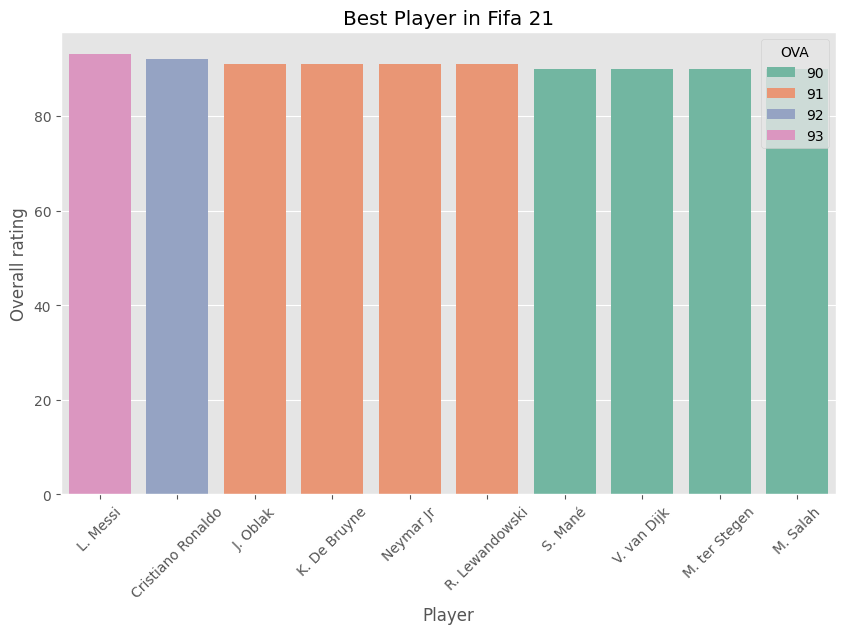

In [216]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values(by='OVA',ascending=False).head(10),x='Name',y='OVA',palette='Set2',hue='OVA')
plt.title('Best Player in Fifa 21')
plt.xlabel('Player')
plt.ylabel('Overall rating')
plt.xticks(rotation=45)

Text(0.5, 0, 'Overall Rating')

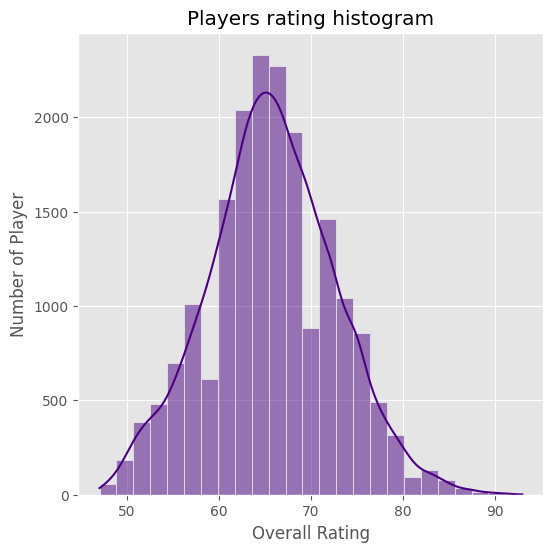

In [224]:
plt.figure(figsize=(6,6))
sns.histplot(df, bins=25,x='OVA',kde=True,color='indigo')
plt.title('Players rating histogram')
plt.ylabel('Number of Player')
plt.xlabel('Overall Rating')

Plot between average age and rating

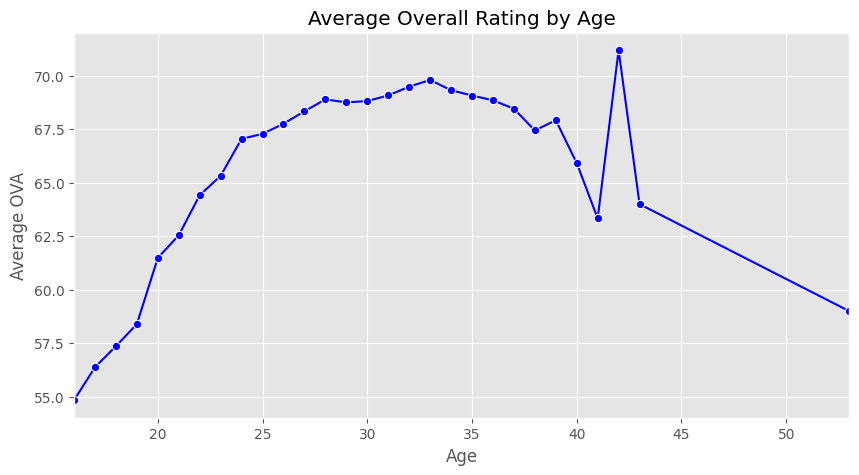

In [231]:
age_avg = df.groupby('Age')['OVA'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=age_avg.index, y=age_avg.values, marker='o', color='blue')

# Set x-axis limits to show the full range of ages
plt.xlim(age_avg.index.min(), age_avg.index.max())

plt.title('Average Overall Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average OVA')
plt.show()

Text(0, 0.5, 'Number of player')

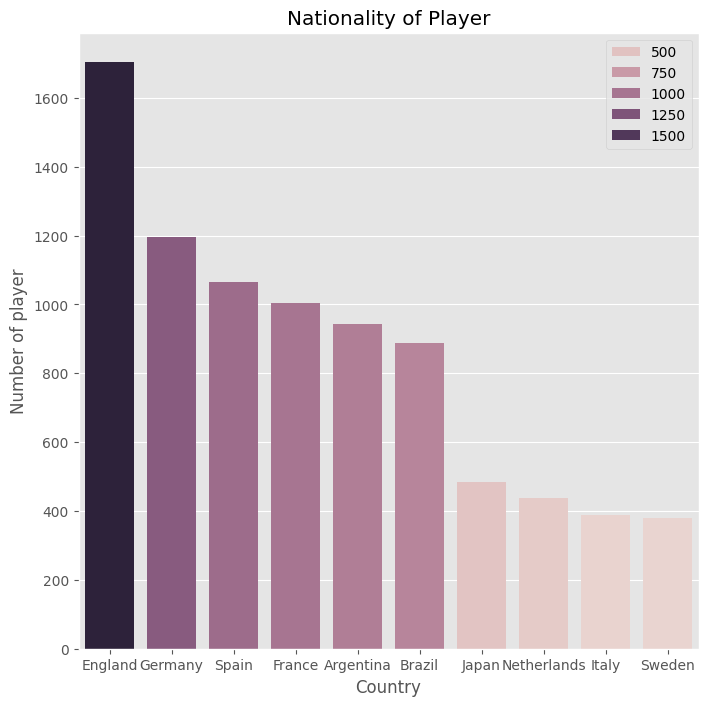

In [244]:
top_nationality=df['Nationality'].value_counts().head(10)
plt.figure(figsize=(8,8))
sns.barplot(x=top_nationality.index,y=top_nationality.values,hue=top_nationality.values)
plt.title('Nationality of Player')
plt.xlabel('Country')
plt.ylabel('Number of player')

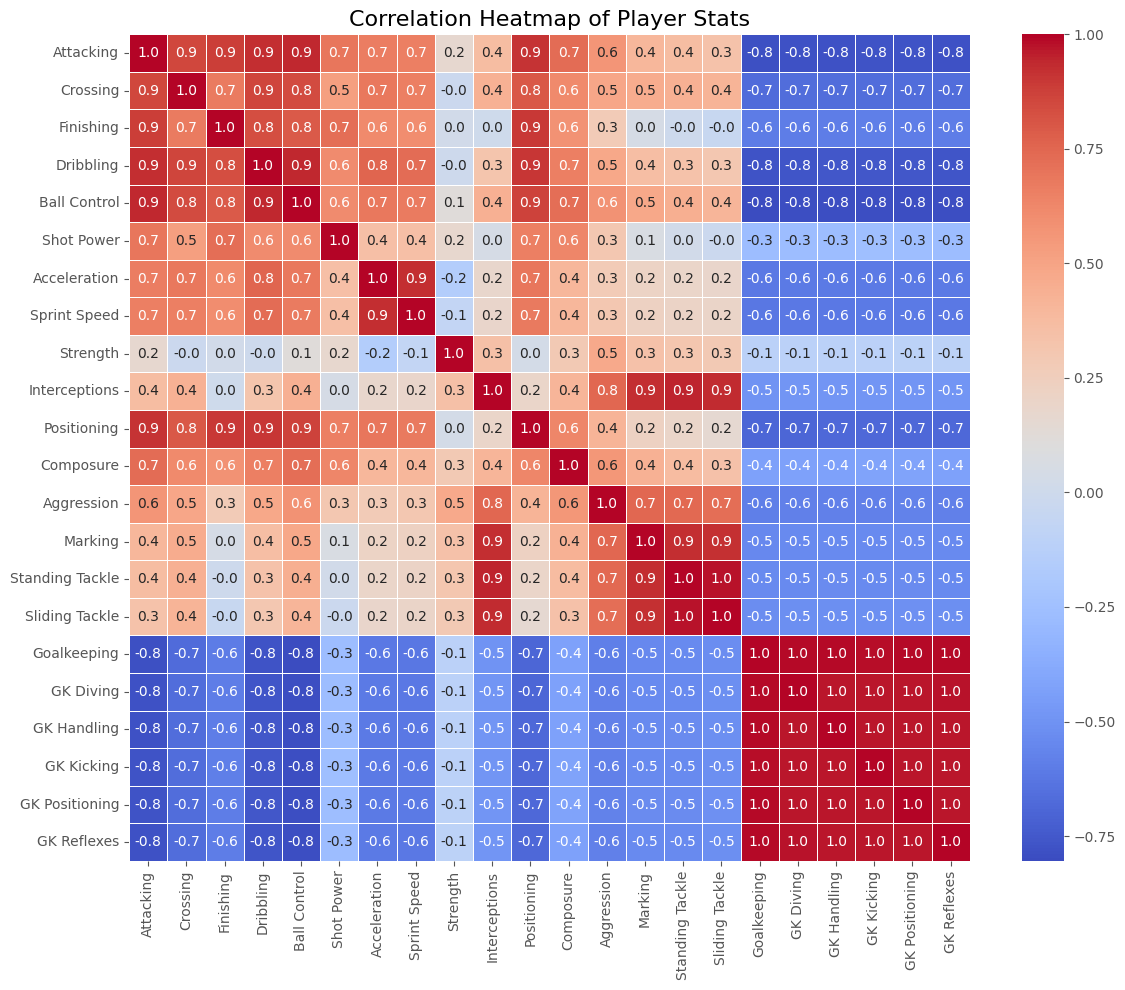

In [252]:
stats_column=[ 'Attacking', 'Crossing', 'Finishing', 'Dribbling', 'Ball Control', 
                 'Shot Power', 'Acceleration', 'Sprint Speed', 'Strength', 'Interceptions', 
                 'Positioning', 'Composure', 'Aggression', 'Marking', 'Standing Tackle', 
                 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 
                 'GK Positioning', 'GK Reflexes']
plt.figure(figsize=(12,10))
sns.heatmap(df[stats_column].corr(),annot=True,fmt='0.1f',cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap of Player Stats', fontsize=16)
plt.tight_layout()
